
# Regresion lineal
1. Modelo polinomial
    * Ejemplo lineal
    * Ejemplo polinomial
    * Solución al ejemplo polinomial
2. Ejemplo con el dataset Boston Housing


## Paquetes interesantes en data science en python
* Pandas (Dataframes)
* Numpy (Operaciones matematicas en matrices)
* Sklearn (Algoritmos de machine learning)
* Matplotlib (Visualizacion)
* Seaborn (Visualización)
* Keras (Redes Neuronales)
* Tensorflow (Redes neuronales)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Regresión lineal

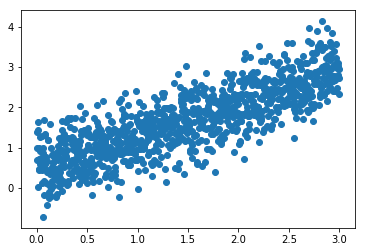

In [4]:
#Genero datos
np.random.seed(0)
num = 1000 # numero de registros
x = np.linspace(0,3,num) # esto genera 1000 numeros del 0 al 3 distribuidos equitativamente
y = 0.5 + 0.8*x +0.5*np.random.normal(size=x.shape[0]) # creamos una variable que depende de x
plt.scatter(x,y)
plt.show()

In [19]:
x.shape=(num,1)
y.shape=(num,1)

Intercept: 
 [0.48202706]
Slope: 
 [[0.79689639]]
Mean squared error: 0.24
R2: 0.66


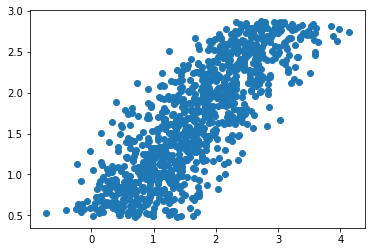

In [20]:
#Ajusto modelo
reg = linear_model.LinearRegression() # creo el objeto modelo
reg = reg.fit(x,y) # ajusto el objeto modelo
print('Intercept: \n', reg.intercept_)
print('Slope: \n', reg.coef_)

#Calculo errores y medidas riesgo
yhat = reg.predict(x)
print("Mean squared error: %.2f" % mean_squared_error(y, yhat))
print('R2: %.2f' % r2_score(y, yhat))

plt.scatter(y, yhat)
plt.show()

## Regresion polinomial

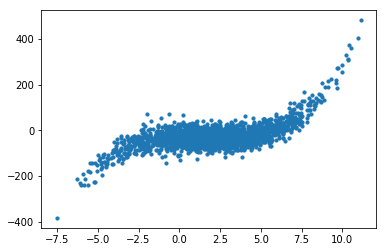

In [21]:
#Genero datos
np.random.seed(0)
num = 2000
x = 2 - 3 * np.random.normal(0, 1, num)
# y depende de una combinación polinomial de x
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-30, 30, num) 
plt.scatter(x,y, s=10)

x.shape=(num, 1)
y.shape=(num, 1)

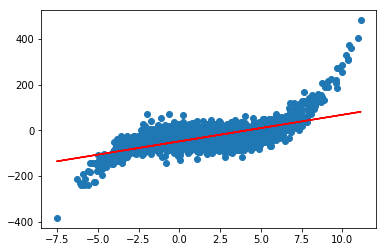

In [22]:
#Ajustamos RL
reg = linear_model.LinearRegression()
reg = reg.fit(x, y)
yhat = reg.predict(x)
reg.coef_

plt.scatter(x, y)
plt.plot(x, yhat, color='r')
plt.show()

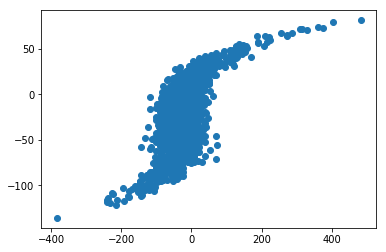

Mean squared error: 1829.23
R2: 0.39


In [23]:
plt.scatter(y, yhat)
plt.show()
print("Mean squared error: %.2f" % mean_squared_error(y, yhat))
print('R2: %.2f' % r2_score(y, yhat))

[[7.78353549 0.97482925]]
[-52.82976702]


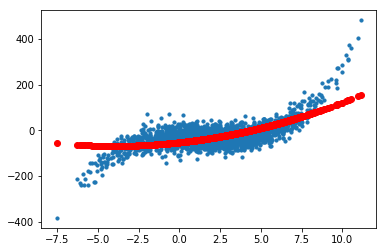

In [34]:
# Ajustamos polinomio grado 2
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures crea automaticamente variables
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(x)
reg2 = linear_model.LinearRegression()
reg2 = reg2.fit(x_poly, y)
yhat2 = reg2.predict(x_poly)
print(reg2.coef_)
print(reg2.intercept_)

plt.scatter(x, y, s=10 )
plt.plot(x, yhat2, 'ro') #con puntos no es problema
plt.show()


Mean squared error: 1693.65
R2: 0.44


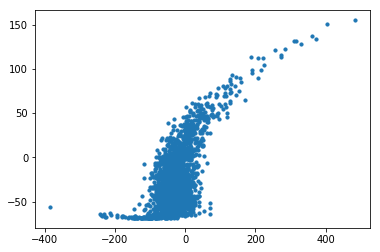

In [26]:
print("Mean squared error: %.2f" % mean_squared_error(y, yhat2))
print('R2: %.2f' % r2_score(y, yhat2))
plt.scatter(y, yhat2, s=10)
plt.show()
#disminuye MSE y aumenta R2

In [11]:
#Ajustamos polinomio grado 3
polynomial_features3 = PolynomialFeatures(degree=3)
x_poly3 = polynomial_features3.fit_transform(x)
reg3 = linear_model.LinearRegression()
reg3 = reg3.fit(x_poly3, y)
yhat3 = reg3.predict(x_poly3)
print(reg3.coef_)

[[ 0.          1.07357786 -2.20002898  0.52193095]]


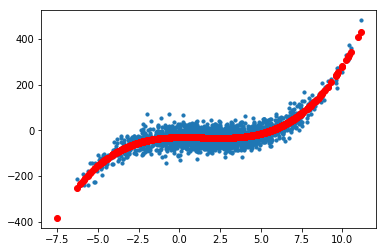

In [12]:
plt.scatter(x, y, s=10)
plt.plot(x, yhat3, 'ro') #con puntos no es problema
plt.show()

Mean squared error: 872.08
R2: 0.71


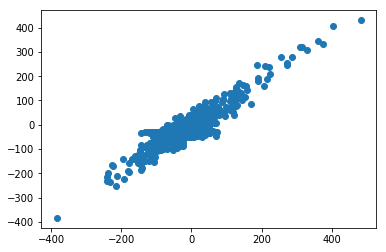

In [13]:
plt.scatter(y, yhat3)
print("Mean squared error: %.2f" % mean_squared_error(y, yhat3))
print('R2: %.2f' % r2_score(y, yhat3))
#disminuye MSE y aumenta R2

## Regresion lineal, interpretar

In [6]:
import pandas as pd
from sklearn import datasets
diabetes_all = datasets.load_diabetes()
print(diabetes_all.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [7]:
print(diabetes_all.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [8]:
diabetes_all.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diabetes = pd.DataFrame(diabetes_all.data, columns=diabetes_all.feature_names)

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
#selecciono solo 3 variables: age, bmi, bp
X = diabetes[["age", "bmi", "bp"]]
print(X.head())
#edad
#body mass
#blod preasure
print(X.isnull().sum())
X.describe()

        age       bmi        bp
0  0.038076  0.061696  0.021872
1 -0.001882 -0.051474 -0.026328
2  0.085299  0.044451 -0.005671
3 -0.089063 -0.011595 -0.036656
4  0.005383 -0.036385  0.021872
age    0
bmi    0
bp     0
dtype: int64


,age,bmi,bp
count,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,-8.045349e-16,1.281655e-16
std,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-9.027530e-02,-1.123996e-01
25%,-3.729927e-02,-3.422907e-02,-3.665645e-02
50%,5.383060e-03,-7.283766e-03,-5.670611e-03
75%,3.807591e-02,3.124802e-02,3.564384e-02
max,1.107267e-01,1.705552e-01,1.320442e-01


In [11]:
#guardo la variable respuesta
Y = pd.DataFrame(diabetes_all.target)
Y.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


###  Modelos univariantes

El MSE es de: 5720.55
El RMSE es de: 75.63
El R2 es de: 0.04
El coeficiente es : 304.18


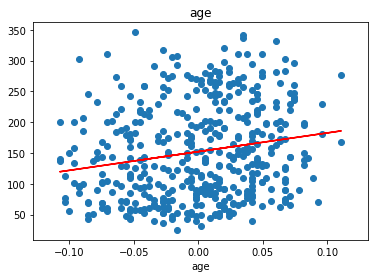

El MSE es de: 3890.46
El RMSE es de: 62.37
El R2 es de: 0.34
El coeficiente es : 949.44


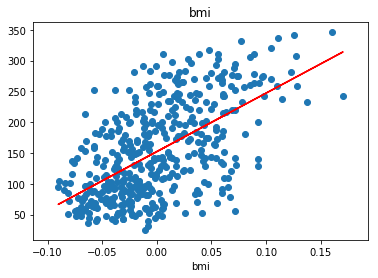

El MSE es de: 4774.10
El RMSE es de: 69.09
El R2 es de: 0.19
El coeficiente es : 714.74


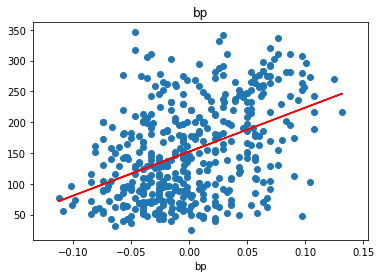

In [13]:
features = ["age", "bmi", "bp"]
for i, col in enumerate(features):
    x = X[[col]] # selecciono la columna(variable)
    plt.scatter(x, Y, marker='o') # hago un plot de la variable respuesta vs la variable explicativa
    plt.title(col) # titulo
    plt.xlabel(col) # nombre eje x
    reg = linear_model.LinearRegression() # creo un objeto "modelo"
    reg = reg.fit(x, Y) # ajusto el modelo con unos datos
    Yhat = reg.predict(x) # hago una predicción a los datos que ya tenia
    print("El MSE es de: %.2f" % mean_squared_error(Y, Yhat))
    print("El RMSE es de: %.2f" % np.sqrt(mean_squared_error(Y, Yhat)))
    print("El R2 es de: %.2f" % r2_score(Y, Yhat))
    print("El coeficiente es : %.2f" % reg.coef_[0])
    plt.plot(x, Yhat, color = "red")
    plt.show()

### Multiple Linear Regression

El MSE es de: 3580.33
El RMSE es de: 59.84
El R2 es de: 0.40
Los coeficientes son : [[ 25.99093614 788.78062759 394.1276443 ]]


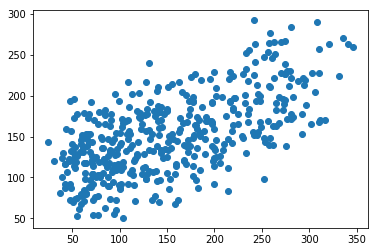

In [12]:
reg = linear_model.LinearRegression()
reg = reg.fit(X, Y)
Yhat = reg.predict(X)
print("El MSE es de: %.2f" % mean_squared_error(Y, Yhat))
print("El RMSE es de: %.2f" % np.sqrt(mean_squared_error(Y, Yhat)))
print("El R2 es de: %.2f" % r2_score(Y, Yhat))
print("Los coeficientes son :", reg.coef_)
plt.scatter(Y, Yhat)
plt.show()

In [16]:
import statsmodels.api as sm
X = sm.add_constant(X)
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     95.81
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.09e-47
Time:                        15:41:44   Log-Likelihood:                -2435.7
No. Observations:                 442   AIC:                             4879.
Df Residuals:                     438   BIC:                             4896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.859     53.211      0.0

## Que faltaria?
* Exploración de nuevas variables
    * Transformación de variables actuales
    * Combinación de diferentes variables
* Validación del modelo
    * Estudio de los errores por variables
    * Entrenamiento del modelo en diferentes datasets